In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt

## Data Reader
Use Data Reader to get stock prices, volumes etc.

In [2]:
ALL_ITEMS = ['AAPL', 'ABBV', 'ABT', 'AMGN', 'AMZN', 'AVGO', 'BRK-B',
             'BA', 'BAC', 'BMY', 'C', 'CELG', 'CMCSA', 'CSCO', 'CVX', 
             'DIS', 'DWDP-W', 'FB', 'GE', 'GILD', 'GOOG', 'HD', 'HON', 'IBM', 'INTC',
             'JNJ', 'JPM', 'KO', 'MA', 'MCD', 'MDT', 'MMM', 'MO',
             'MRK', 'MSFT', 'NVDA', 'ORCL', 'PEP', 'PFE', 'PG', 'PM',
             '^SPX', 'T', 'UNH', 'V', 'VZ', 'WFC', 'WMT', 'XOM']
data = {}
for k in ALL_ITEMS:
    try:
        data[k] = pdr.data.DataReader(k, start='1980-01-01', end='2020-07-31', data_source='yahoo')
    except Exception as e:
        print(f'An exception occurred for {k}: exception type: {e}')

An exception occurred for CELG: exception type: No data fetched for symbol CELG using YahooDailyReader
An exception occurred for DWDP-W: exception type: No data fetched for symbol DWDP-W using YahooDailyReader
An exception occurred for ^SPX: exception type: 'Date'


## Create a dataframe with adjusted prices
Create a dataset with adjusted prices as columns and dates as index.

In [3]:
data_df = pd.DataFrame()

for k, v in data.items():
    stock = pd.DataFrame({f'{k}': v['Adj Close']})
    print('stock:', [k], stock.columns)
    data_df = pd.concat([data_df, stock], axis=1)

stock: ['AAPL'] Index(['AAPL'], dtype='object')
stock: ['ABBV'] Index(['ABBV'], dtype='object')
stock: ['ABT'] Index(['ABT'], dtype='object')
stock: ['AMGN'] Index(['AMGN'], dtype='object')
stock: ['AMZN'] Index(['AMZN'], dtype='object')
stock: ['AVGO'] Index(['AVGO'], dtype='object')
stock: ['BRK-B'] Index(['BRK-B'], dtype='object')
stock: ['BA'] Index(['BA'], dtype='object')
stock: ['BAC'] Index(['BAC'], dtype='object')
stock: ['BMY'] Index(['BMY'], dtype='object')
stock: ['C'] Index(['C'], dtype='object')
stock: ['CMCSA'] Index(['CMCSA'], dtype='object')
stock: ['CSCO'] Index(['CSCO'], dtype='object')
stock: ['CVX'] Index(['CVX'], dtype='object')
stock: ['DIS'] Index(['DIS'], dtype='object')
stock: ['FB'] Index(['FB'], dtype='object')
stock: ['GE'] Index(['GE'], dtype='object')
stock: ['GILD'] Index(['GILD'], dtype='object')
stock: ['GOOG'] Index(['GOOG'], dtype='object')
stock: ['HD'] Index(['HD'], dtype='object')
stock: ['HON'] Index(['HON'], dtype='object')
stock: ['IBM'] Index([

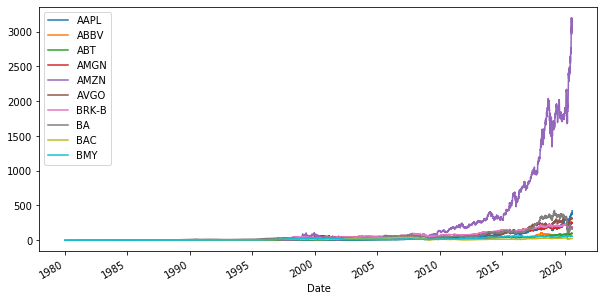

In [4]:
data_df.iloc[:, :10].plot(figsize=(10, 5));

In [5]:
data_df.head()

,AAPL,ABBV,ABT,AMGN,AMZN,AVGO,BRK-B,BA,BAC,BMY,...,PFE,PG,PM,T,UNH,V,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.849159,0.129047,0.096055,...,0.000661,0.033995,NaN,NaN,NaN,NaN,NaN,0.003375,0.049441,0.607339
1980-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.872450,0.127853,0.095065,...,0.000661,0.033537,NaN,NaN,NaN,NaN,NaN,0.003326,0.048887,0.591838
1980-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.054105,0.127853,0.095395,...,0.000685,0.033709,NaN,NaN,NaN,NaN,NaN,0.003358,0.049994,0.597475
1980-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.128629,0.129047,0.095725,...,0.000685,0.033537,NaN,NaN,NaN,NaN,NaN,0.003358,0.049810,0.594657
1980-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.161235,0.127853,0.099026,...,0.000718,0.033652,NaN,NaN,NaN,NaN,NaN,0.003375,0.050732,0.598884


## Save data

In [6]:
import os
data_df.to_csv(os.path.join('data','stocks_1980_2020.csv'))